# Objective

Your deliverable should include the following:
-       Must be solved in Python
-       The script you developed to clean the CSV (should be a .py/.ipnyb or .ipy file)
-       A copy of the cleaned CSV
-       Your analytical answers organized in an Excel sheet with the data or data summary used and a brief description of how           you found the answer

At minimum, your script should address the following:
-       Identify and clean typos, misspellings, and other standard human errors
-       Remove the time stamp from ORDERDATE column
-       Add a dollar sign to any money-related columns
-       Separate the Month and Year into two separate columns
-       Remove blank columns

Once you feel the data is ready, answer the following to the best of your abilities and briefly describe your process:
-       What is the population average quantity per order?
-       What is our top selling product?
-       What is the average cancellation rate?
-       Put together summary metrics and a brief description of your observations for each type of DEAL SIZE

This should include, at minimum: sample averages and a list of the top 5 clients for each category
-       What was our strongest sales period by volume? By value?
-       What is our top selling region by volume? Is this the same as by value?

In [874]:
# loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno # For plotting missing values

In [875]:
# Loading the data
sales = pd.read_csv('sales.csv', encoding="ISO-8859-1", dtype= {'PRODUCTLINE': 'category', 'MSRP': float, 'SALES': float}, parse_dates= ['ORDERDATE'])
#sales = sales.drop(['Month-Year'], axis=1) # Removing Month-Year column as I am required to extract Month and Year sepeartely already
pd.set_option('max_columns', None)
sales.head(n=10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shppd,1,2-2003,Motorcycles,95.0,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shppd,2,5-2003,Motorcycles,95.0,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shppd,3,7-2003,Motorcycles,95.0,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shppd,3,8-2003,Motorcycles,95.0,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shppd,4,10-2003,Motorcycles,95.0,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shppd,4,10-2003,Motorcycles,95.0,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
6,10180,29,86.13,9,2497.77,2003-11-11,Shppd,4,11-2003,Motorcycles,95.0,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
7,10188,48,100.00,1,5512.32,2003-11-18,Shppd,4,11-2003,Motorcycles,95.0,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shppd,4,12-2003,Motorcycles,95.0,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
9,10211,41,100.00,14,4708.44,2004-01-15,Shppd,1,1-2004,Motorcycles,95.0,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [876]:
# Printing out data type
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   Month-Year        2823 non-null   object        
 9   PRODUCTLINE       2823 non-null   category      
 10  MSRP              2823 non-null   float64       
 11  PRODUCTCODE       2823 non-null   object        
 12  CUSTOMERNAME      2823 non-null   object        
 13  PHONE             2823 non-null   object        
 14  ADDRESSLINE1      2823 n

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,214.000000


# Data Cleaning

In [877]:
# Checking out for duplicated values based on customer names and their addresses
sales.duplicated().sum()

0

In [878]:
# Verify with dataframe
sales[sales.duplicated()].sort_values(by='CUSTOMERNAME')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE


There is no duplicates. I checked the duplicates based on similar customer names if the rows are similar i.e. entered mistakenly more than once during data entry. Further to double check, I went one step further and checked repeated customers and how they look like. There are bunch of customers who repeatedly bought from the company but I'll explore that later during analysis part. 

In [879]:
dup = sales[sales.duplicated(subset= ['CUSTOMERNAME', 'ADDRESSLINE1'], keep='first')]
dup.sort_values('CUSTOMERNAME')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
527,10110,37,100.00,16,5433.08,2003-03-18,Shppd,1,3-2003,Classic Cars,124.0,S18_1589,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Medium
2040,10332,41,77.24,14,3166.84,2004-11-17,Shipped,4,11-2004,Vintage Cars,41.0,S24_3969,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Medium
2474,10306,50,54.00,3,2700.00,2004-10-14,Shipped,4,10-2004,Ships,66.0,S700_1138,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Small
681,10110,32,50.25,6,1608.00,2003-03-18,Shppd,1,3-2003,Vintage Cars,60.0,S18_2248,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Small
1283,10332,50,100.00,2,7310.00,2004-11-17,Shipped,4,11-2004,Vintage Cars,92.0,S18_4409,"AV Stores, Co.",(171) 555-1555,Fauntleroy Circus,NaN,Manchester,NaN,EC2 5NT,UK,EMEA,Ashworth,Victoria,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,10316,34,43.70,12,1485.80,2004-11-01,Shipped,4,11-2004,Planes,49.0,S72_1253,giftsbymail.co.uk,(198) 555-8888,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small
2606,10316,48,74.45,18,3573.60,2004-11-01,Shipped,4,11-2004,Ships,72.0,S700_2610,giftsbymail.co.uk,(198) 555-8888,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium
2014,10316,30,77.79,8,2333.70,2004-11-01,Shipped,4,11-2004,Planes,68.0,S24_3949,giftsbymail.co.uk,(198) 555-8888,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Small
2551,10316,45,93.24,13,4195.80,2004-11-01,Shipped,4,11-2004,Ships,90.0,S700_2047,giftsbymail.co.uk,(198) 555-8888,Garden House Crowther Way,NaN,Cowes,Isle of Wight,PO31 7PJ,UK,EMEA,Bennett,Helen,Medium


Before going ahead to analysis, let's check out the data and do some data cleaning. Phone number does not look standardized and uniformed. I am going to make the phone numbers uniformed. As you can say some rows have brackets, some have + and some have space. It should be cleaned. Although we don't need to clean phone column for data analysis but it's a good approach to get the data cleaned before analysis


In [880]:
# Phone numbers
sales[['PHONE']]

,PHONE
0,2125557818
1,26.47.1555
2,+33 1 46 62 7555
3,6265557265
4,6505551386
...,...
2818,(91) 555 94 44
2819,981-443655
2820,(91) 555 94 44
2821,61.77.6555


In [881]:
# Using regular expression and str.replace function to remove any non-digit character from PHONE column
sales['PHONE'] = sales['PHONE'].str.replace('+', "00")
sales['PHONE'] = sales['PHONE'].str.replace(r'\D+', '') 
sales[['PHONE']]

,PHONE
0,2125557818
1,26471555
2,0033146627555
3,6265557265
4,6505551386
...,...
2818,915559444
2819,981443655
2820,915559444
2821,61776555


In [882]:
# I see type error in Status column, let's fix it
sales['STATUS'] = sales['STATUS'].str.replace('Shppd', 'Shipped')
sales['STATUS'] = sales['STATUS'].str.replace('Canceled', 'Cancelled')
sales['STATUS'].unique()

array(['Shipped', 'Disputed', 'In Process', 'Cancelled', 'On Hold',
       'Resolved'], dtype=object)

Typo is fixed now. I don't see any other typo error in this column. Other than this typo, I did not find any other typo in this dataset. Going forward, I'll add $ sign with the price. 

In [883]:
# Adding $ sign to SALES and MSRP columns
sales['SALES'] = sales['SALES'].map('${:,.2f}'.format)
sales['MSRP'] = sales['MSRP'].map('${:,.2f}'.format)
sales[['SALES', 'MSRP']]

,SALES,MSRP
0,"$2,871.00",$95.00
1,"$2,765.90",$95.00
2,"$3,884.34",$95.00
3,"$3,746.70",$95.00
4,"$5,205.27",$95.00
...,...,...
2818,"$2,244.40",$54.00
2819,"$3,978.51",$54.00
2820,"$5,417.57",$54.00
2821,"$2,116.16",$54.00


In [884]:
# Splitting the months and years
sales['YEAR'] = pd.DatetimeIndex(sales['ORDERDATE']).year
sales['MONTH'] = pd.DatetimeIndex(sales['ORDERDATE']).month
sales[['ORDERDATE', 'YEAR', 'MONTH']] # Printing required columns to double check

,ORDERDATE,YEAR,MONTH
0,2003-02-24,2003,2
1,2003-05-07,2003,5
2,2003-07-01,2003,7
3,2003-08-25,2003,8
4,2003-10-10,2003,10
...,...,...,...
2818,2004-12-02,2004,12
2819,2005-01-31,2005,1
2820,2005-03-01,2005,3
2821,2005-03-28,2005,3


In [885]:
# duplicate rows
duplicates = sales.duplicated()
sales[sales.duplicated()].sum()

ORDERNUMBER         0.0
QUANTITYORDERED     0.0
PRICEEACH           0.0
ORDERLINENUMBER     0.0
SALES               0.0
ORDERDATE           0.0
STATUS              0.0
QTR_ID              0.0
Month-Year          0.0
PRODUCTLINE         0.0
MSRP                0.0
PRODUCTCODE         0.0
CUSTOMERNAME        0.0
PHONE               0.0
ADDRESSLINE1        0.0
ADDRESSLINE2        0.0
CITY                0.0
STATE               0.0
POSTALCODE          0.0
COUNTRY             0.0
TERRITORY           0.0
CONTACTLASTNAME     0.0
CONTACTFIRSTNAME    0.0
DEALSIZE            0.0
YEAR                0.0
MONTH               0.0
dtype: float64

In [886]:
column_names = ['CUSTOMERNAME', 'ADDRESSLINE1']
#sales[sales.duplicated(subset= column_names, keep='first')]

# Double check the duplicates
sales[duplicates].sort_values(by='CUSTOMERNAME')

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH


In [887]:
# drop duplicates
sales.drop_duplicates(inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   object        
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   Month-Year        2823 non-null   object        
 9   PRODUCTLINE       2823 non-null   category      
 10  MSRP              2823 non-null   object        
 11  PRODUCTCODE       2823 non-null   object        
 12  CUSTOMERNAME      2823 non-null   object        
 13  PHONE             2823 non-null   object        
 14  ADDRESSLINE1      2823 n

In [888]:
# Checking if there is anything wrong with length of phone numbers. Usually lengths are around 8 - 12 so it seems fine to me
sales['PHONE'].str.len().describe()


count    2823.000000
mean        9.885583
std         1.318253
min         8.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        14.000000
Name: PHONE, dtype: float64

In [889]:
 # Checking the missing values
sales.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
Month-Year             0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
YEAR                   0
MONTH                  0
dtype: int64

According to the table above, there are no missing values in the most columns that I will be using for data analysis. ADDRESSLINE2, STATE, POSTALCODE AND TERRITORY have missing values which will not make any difference to the analysis but sometimes addresses are important for mailing marketing promotions depending upon the industry and customer segment. There are various ways to handle missing values. In case of numeric columns, I could either remove it if they were few or I could use mean of the entire column. In this case, I don't have to replace the values nor I have to delete the rows merely because of missing information on address. Let's explore the missing values anyway. 

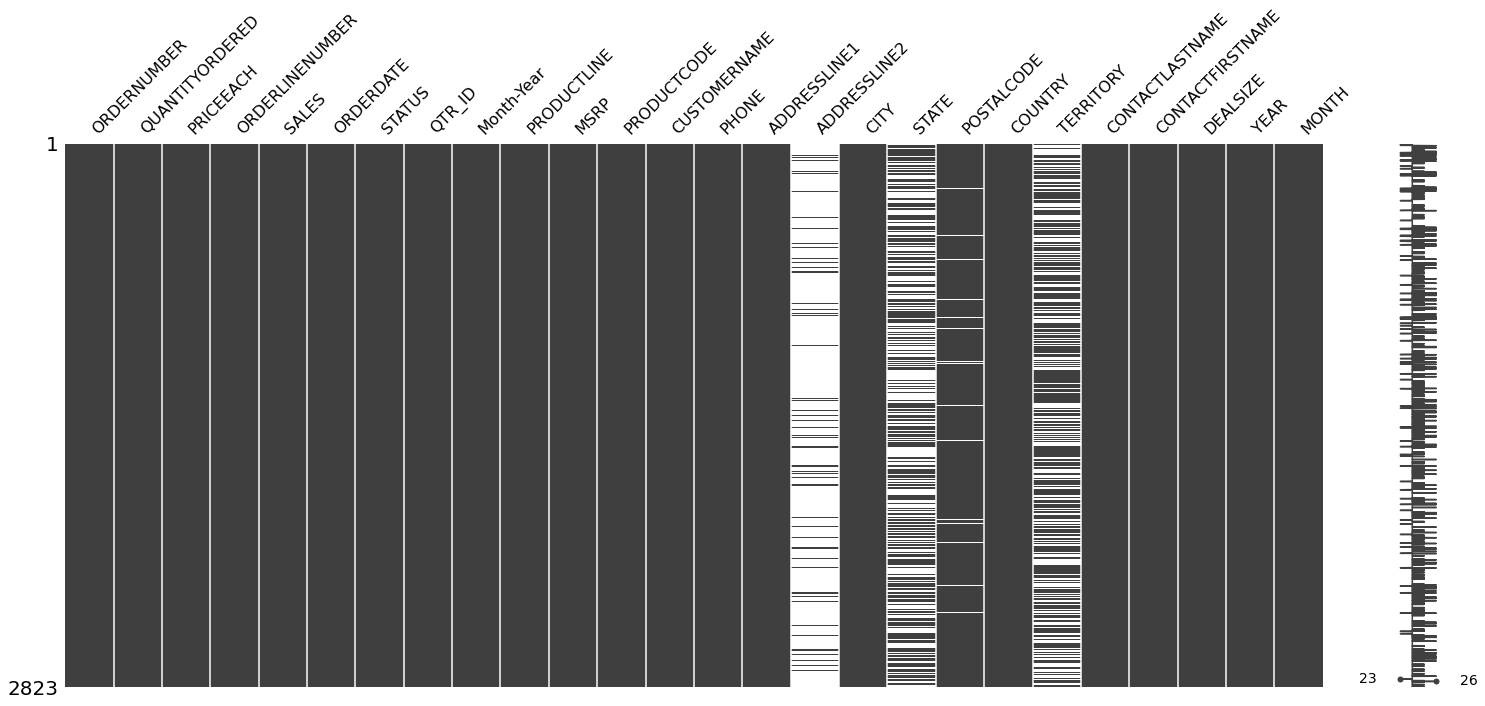

In [890]:
msno.matrix(sales)
plt.show()

As mentioned in the table, we can verify that the missing values are scattered and they exist in ADDRESSLINE2, STATE, POSTALCODE and TERRITORY. Although I can ignore them but I am curious and I want to explore the reasoning behind if possible. 

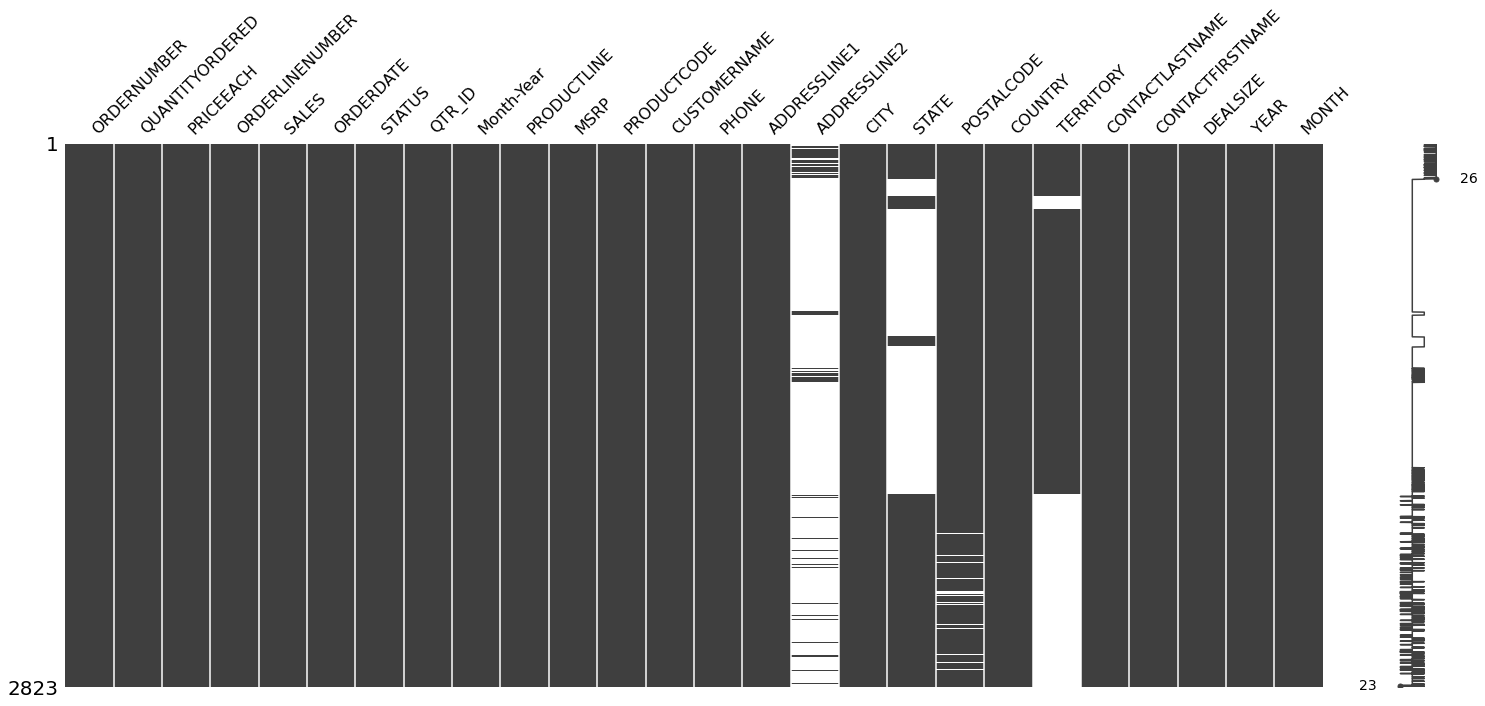

In [891]:
# Let's explore missing values 
#missing = sales[sales['POSTALCODE'].isna()]
#complete = sales[~sales['POSTALCODE'].isna()]

sales_sorted = sales.sort_values(by='COUNTRY') # Missing postal codes could be international customers. It can be seen below
msno.matrix(sales_sorted)
plt.show()

In [892]:
# Most of non-US customers don't have POSTALCODES 
sales_us = sales[sales['COUNTRY'] != 'USA']
sales_us.head(50)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH
1,10121,34,81.35,5,"$2,765.90",2003-05-07,Shipped,2,5-2003,Motorcycles,$95.00,S10_1678,Reims Collectables,26471555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2003,5
2,10134,41,94.74,2,"$3,884.34",2003-07-01,Shipped,3,7-2003,Motorcycles,$95.00,S10_1678,Lyon Souveniers,0033146627555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2003,7
6,10180,29,86.13,9,"$2,497.77",2003-11-11,Shipped,4,11-2003,Motorcycles,$95.00,S10_1678,Daedalus Designs Imports,20161555,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small,2003,11
7,10188,48,100.00,1,"$5,512.32",2003-11-18,Shipped,4,11-2003,Motorcycles,$95.00,S10_1678,Herkku Gifts,004722673215,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium,2003,11
9,10211,41,100.00,14,"$4,708.44",2004-01-15,Shipped,1,1-2004,Motorcycles,$95.00,S10_1678,Auto Canal Petit,147556555,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium,2004,1
10,10223,37,100.00,1,"$3,965.66",2004-02-20,Shipped,1,2-2004,Motorcycles,$95.00,S10_1678,"Australian Collectors, Co.",0395204555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium,2004,2
14,10275,45,92.83,1,"$4,177.35",2004-07-23,Shipped,3,7-2004,Motorcycles,$95.00,S10_1678,La Rochelle Gifts,40678555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Medium,2004,7
16,10299,23,100.00,9,"$2,597.39",2004-09-30,Shipped,3,9-2004,Motorcycles,$95.00,S10_1678,"Toys of Finland, Co.",902248555,Keskuskatu 45,NaN,Helsinki,NaN,21240,Finland,EMEA,Karttunen,Matti,Small,2004,9
17,10309,41,100.00,5,"$4,394.38",2004-10-15,Shipped,4,10-2004,Motorcycles,$95.00,S10_1678,Baane Mini Imports,07989555,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,EMEA,Bergulfsen,Jonas,Medium,2004,10
20,10341,41,100.00,9,"$7,737.93",2004-11-24,Shipped,4,11-2004,Motorcycles,$95.00,S10_1678,Salzburg Collectables,65629555,Geislweg 14,NaN,Salzburg,NaN,5020,Austria,EMEA,Pipps,Georg,Large,2004,11


In [895]:
# Saving the csv file
#sales.to_csv('sales2.csv')

# Data Analysis 

In [896]:
# Removing non-digits from data for data analysis
sales['SALES'] = sales['SALES'].str.replace('$', '')
sales['SALES'] = sales['SALES'].str.replace(',', '')
sales['SALES'] = sales['SALES'].astype(float)
sales[['SALES']]

,SALES
0,2871.00
1,2765.90
2,3884.34
3,3746.70
4,5205.27
...,...
2818,2244.40
2819,3978.51
2820,5417.57
2821,2116.16


<Figure size 1440x720 with 0 Axes>

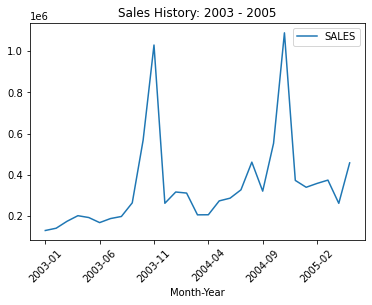

In [897]:
# Joining Month and Year columns
sales['Month-Year'] = sales['MONTH'].map(str)+'-'+sales['YEAR'].map(str)
sales['Month-Year'] = pd.to_datetime(sales['Month-Year'], format= '%m-%Y').dt.strftime('%Y-%m')

# Calculating sales on 'YEAR-MONTH'
cum_sales = sales.groupby(['Month-Year'])['SALES'].sum().reset_index().rename(columns = {'sum': 'sales'}).sort_values('Month-Year')
cum_sales
# Create plot
plt.figure(figsize= (20,10))
cum_sales.plot(x= 'Month-Year', y='SALES', kind='line', rot=45, title="Sales History: 2003 - 2005")
plt.show()

It shows that sales in this company are seasonal. It increases almost by the end of the years throughout the data and then drops back in the start of the year. It can be due to several reasons which need more in-depth understanding of the company and product lines but we can clearly prepare our inventory accordingly and even increase marketing promotions for growing the sales. 

#  Top Selling Products

In [898]:
# Summing the total sales for each product and picking top 20 products
top_product = sales.groupby(['PRODUCTCODE'])['SALES'].sum().reset_index().rename(columns = {'sum': 'sales'})
top_product = top_product.head(20)
top_product = top_product.sort_values('SALES', ascending=False)
top_product

,PRODUCTCODE,SALES
1,S10_1949,191073.03
3,S10_4698,170401.07
7,S12_1108,168585.32
12,S12_3891,145332.04
9,S12_2823,140006.16
6,S12_1099,137177.01
8,S12_1666,136692.72
17,S18_1129,129757.49
5,S10_4962,127548.16
10,S12_3148,125449.75


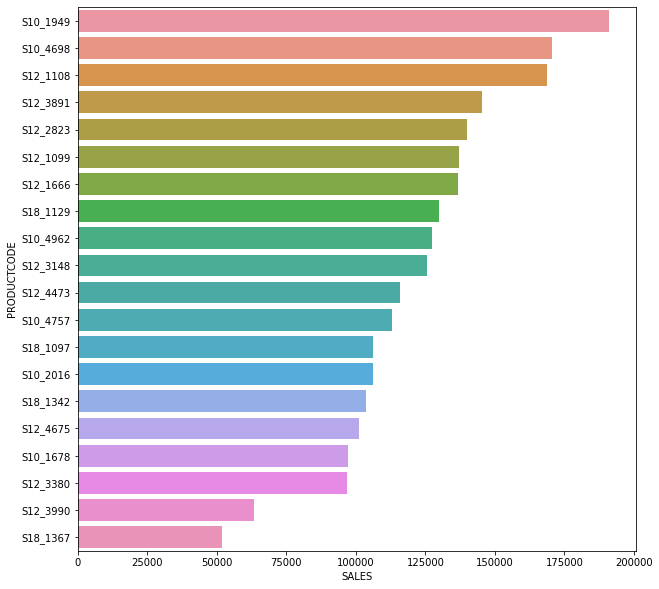

In [899]:
# Creating barplot for top 20 products based on high sales
plt.subplots(figsize= (10, 10))
sns.barplot(y="PRODUCTCODE", x="SALES", data=top_product)

Above barplots show top 20 products by their cumulative sales throughout 2003 - 2005. I have printed both table and barplot to check out the products. 

## Top 10 Clients Overall

In [900]:
top10_clients = sales.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values('SALES', ascending=False)
top10_clients = top10_clients.head(15)
top10_clients

,CUSTOMERNAME,SALES
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90
31,"Dragon Souveniers, Ltd.",172989.68
45,Land of Toys Inc.,164069.44
81,The Sharp Gifts Warehouse,160010.27
0,"AV Stores, Co.",157807.81
3,"Anna's Decorations, Ltd",153996.13


[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Sales'),
 Text(0.5, 1.0, 'Top 10 Clients by Sales in all categories')]

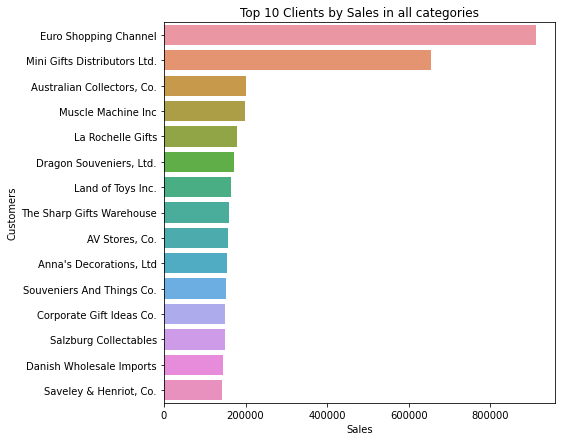

In [901]:
# Creating barplot for top 10 clients overall
f, ax = plt.subplots(figsize= (7, 7))
sns.barplot(y="CUSTOMERNAME", x="SALES", data= top10_clients)
ax.set(xlabel="Sales", ylabel="Customers", title='Top 10 Clients by Sales in all categories')

Euro Shopping Channel is the biggest clients in terms of sales

# Average Cancellation Rate

In [902]:
# Creating df of required columns
avg_cancel = sales.groupby('Month-Year')['STATUS'].value_counts().to_frame()
avg_cancel.rename(columns ={avg_cancel.columns[0]: "Counts"}, inplace=True)
avg_cancel = avg_cancel.reset_index()
avg_cancel

# Changing to wide format
cancel_p = avg_cancel.pivot(index='Month-Year',
                columns= 'STATUS').fillna(0).astype(int).reset_index()

# Removing first level column names and renaming columns
cancel_p.columns = cancel_p.columns.droplevel()
cancel_p = cancel_p.rename(columns= {'' : 'Date'})

# Calculating cancellation_rate; cancelled orders in a month / total non-cancelled orders
cancel_p['total_noncancelled'] = cancel_p['Disputed'] + cancel_p['In Process'] + cancel_p['On Hold'] + cancel_p['Resolved'] + cancel_p['Shipped']
cancel_p['cancellation_rate'] = ((cancel_p['Cancelled'] / cancel_p['total_noncancelled']) * 100)
cancel_p.sort_values('cancellation_rate', ascending=False)

STATUS,Date,Cancelled,Disputed,In Process,On Hold,Resolved,Shipped,total_noncancelled,cancellation_rate
17,2004-06,30,0,0,0,0,55,55,54.545455
16,2004-05,14,0,0,0,0,60,60,23.333333
9,2003-10,16,0,0,0,8,134,142,11.267606
0,2003-01,0,0,0,0,0,39,39,0.000000
15,2004-04,0,0,0,0,0,64,64,0.000000
27,2005-04,0,3,0,24,0,29,56,0.000000
26,2005-03,0,0,0,0,18,88,106,0.000000
25,2005-02,0,0,0,0,0,97,97,0.000000
24,2005-01,0,0,0,0,13,86,99,0.000000
23,2004-12,0,0,0,0,0,110,110,0.000000


<Figure size 1440x720 with 0 Axes>

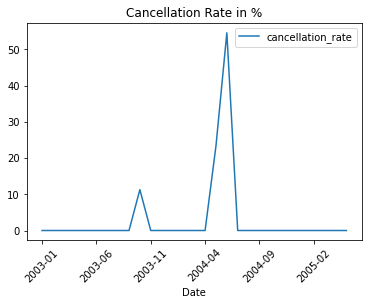

In [903]:
# Create plot
plt.figure(figsize= (20,10))
cancel_p.plot(x='Date', y='cancellation_rate', kind='line', rot=45, title="Cancellation Rate in %")
plt.show()

Mostly, cancellation rates are always 0 but due to some reason cancellation rate jumped to 23.33% and 54.54% in May and June of 2004. Since I don't know the reason behind that's why it's hard to suggest anything at this point. It could be because of any reason. There was also 11.26% cancellation rate in October of 2003. Other than these three months; cancellation rate stands at 0 which shows they are performing good.

# Summary metrics for Deal Size

## Small Dealsize

In [904]:
#sales['DEALSIZE'].unique()
small = sales[sales['DEALSIZE'] == 'Small']

# Creating function to drop columns for summary statistics
def summary(data):
    data = data.describe()
    data = data.drop(labels=['YEAR', 'MONTH'], axis=1)
    return data

# Summary metrics for Small Dealsize 
summary(small)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID
count,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000,1282.000000
mean,10258.010920,30.525741,69.047496,6.649766,2061.682800,2.726209
std,90.952621,8.485265,20.385630,4.200827,577.183322,1.195522
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000
25%,10180.000000,24.000000,53.302500,3.000000,1638.335000,2.000000
50%,10263.000000,29.000000,67.170000,6.000000,2113.975000,3.000000
75%,10332.000000,36.000000,86.755000,10.000000,2544.592500,4.000000
max,10425.000000,64.000000,100.000000,18.000000,2999.970000,4.000000


In [905]:
small_min = small[small['SALES'] == 482.13]
small_min.append(small[small['SALES'] == 2999.97])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH
2249,10425,11,43.83,6,482.13,2005-05-31,In Process,2,2005-05,Trucks and Buses,$54.00,S32_2509,La Rochelle Gifts,40678555,"67, rue des Cinquante Otages",NaN,Nantes,NaN,44000,France,EMEA,Labrune,Janine,Small,2005,5
1101,10238,41,73.17,6,2999.97,2004-04-09,Shipped,2,2004-04,Classic Cars,$80.00,S18_3278,Danish Wholesale Imports,31123555,Vinb'ltet 34,NaN,Kobenhavn,NaN,1734,Denmark,EMEA,Petersen,Jytte,Small,2004,4


The biggest deal in small dealsize was with "Danish Wholesale Imports" and amount of sales was 2999.97 and smallest deal in small dealsize category is with "La Rochelle Gifts" and amount of sales was 482.13.

In [906]:
# Top 5 Clients for Small dealsize Category
small5 = small.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values('SALES', ascending= False).head(5)
small5

,CUSTOMERNAME,SALES
33,Euro Shopping Channel,237852.28
55,Mini Gifts Distributors Ltd.,153135.56
6,"Australian Collectors, Co.",57325.62
67,Rovelli Gifts,56972.88
45,Land of Toys Inc.,53253.52


[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Total Sales for top 5 clients in small dealsize')]

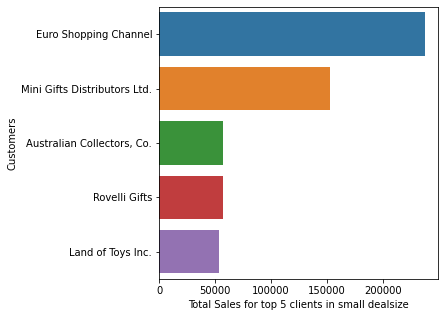

In [907]:
# Creating barplot for top 5 clients for small dealsize
f, ax = plt.subplots(figsize= (5, 5))
sns.barplot(y="CUSTOMERNAME", x="SALES", data= small5)
ax.set(xlabel="Total Sales for top 5 clients in small dealsize", ylabel="Customers")

## Medium Dealsize

In [908]:
#sales['DEALSIZE'].unique()
medium = sales[sales['DEALSIZE'] == 'Medium']

# Creating function to drop columns for summary statistics
def summary(data):
    data = data.describe()
    data = data.drop(labels=['YEAR', 'MONTH'], axis=1)
    return data

# Summary metrics for Small Dealsize 
summary(medium)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID
count,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000,1384.000000
mean,10257.986994,37.947254,95.361741,6.420520,4398.433699,2.720376
std,92.301558,8.443130,8.991058,4.289358,1047.090148,1.218318
min,10100.000000,20.000000,55.720000,1.000000,3002.400000,1.000000
25%,10178.000000,32.000000,95.950000,3.000000,3516.285000,2.000000
50%,10262.000000,39.000000,100.000000,6.000000,4162.750000,3.000000
75%,10334.000000,45.000000,100.000000,9.000000,5176.410000,4.000000
max,10425.000000,66.000000,100.000000,18.000000,6996.420000,4.000000


In [909]:
# Smallest and largest sales trasnaction for medium dealsize
medium_min = medium[medium['SALES']== 3002.40]
medium_min.append(medium[medium['SALES']== 6996.42])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH
2008,10250,40,75.06,13,3002.40,2004-05-11,Shipped,2,2004-05,Planes,$68.00,S24_3949,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Medium,2004,5
1978,10203,47,100.00,3,6996.42,2003-12-02,Shipped,4,2003-12,Classic Cars,$140.00,S24_3856,Euro Shopping Channel,915559444,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium,2003,12


Smallest transaction in medium dealsize is with "The Sharp Gifts Warehouse" and amount of transaction is 3002.40 and largest transactions by sales is with "Euro Shopping Channel" and amount is 6996.42. Now let's create a list of top 5 clients for medium dealsize category.

In [910]:
# Top 5 Clients for Small dealsize Category
medium5 = medium.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values('SALES', ascending= False).head(5)
medium5

,CUSTOMERNAME,SALES
33,Euro Shopping Channel,580216.42
55,Mini Gifts Distributors Ltd.,408562.74
58,Muscle Machine Inc,128034.90
6,"Australian Collectors, Co.",124630.90
44,La Rochelle Gifts,122367.40


[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Total Sales for top 5 clients in medium dealsize')]

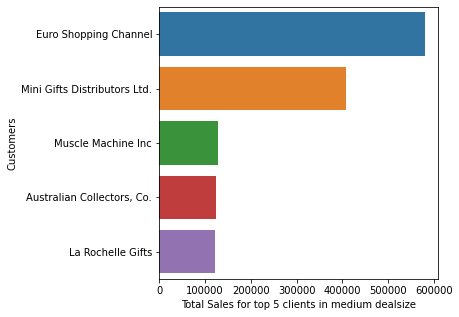

In [911]:
# Creating barplot for top 5 clients for medium dealsize
f, ax = plt.subplots(figsize= (5, 5))
sns.barplot(y="CUSTOMERNAME", x="SALES", data= medium5)
ax.set(xlabel="Total Sales for top 5 clients in medium dealsize", ylabel="Customers")

## Large Dealsize

In [912]:
#sales['DEALSIZE'].unique()
large = sales[sales['DEALSIZE'] == 'Large']

# Creating function to drop columns for summary statistics
def summary(data):
    data = data.describe()
    data = data.drop(labels=['YEAR', 'MONTH'], axis=1)
    return data

# Summary metrics for Small Dealsize 
summary(large)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,10271.063694,47.222930,99.799554,5.369427,8293.753248,2.624204
std,98.872145,10.082098,1.290157,3.676479,1294.739895,1.145862
min,10105.000000,29.000000,88.750000,1.000000,7016.310000,1.000000
25%,10188.000000,42.000000,100.000000,2.000000,7329.060000,2.000000
50%,10272.000000,46.000000,100.000000,4.000000,8008.560000,2.000000
75%,10367.000000,50.000000,100.000000,8.000000,8754.690000,4.000000
max,10424.000000,97.000000,100.000000,17.000000,14082.800000,4.000000


In [913]:
# Min and max sales in large dealsize
#large['SALES'].min()
large_min = large[large['SALES'] == 7016.31]
large_min.append(large[large['SALES'] == 14082.80])

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,Month-Year,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,YEAR,MONTH
277,10230,43,100.0,1,7016.31,2004-03-15,Shipped,1,2004-03,Classic Cars,$151.00,S12_3148,"Blauer See Auto, Co.",00496966902555,Lyonerstr. 34,NaN,Frankfurt,NaN,60528,Germany,EMEA,Keitel,Roland,Large,2004,3
598,10407,76,100.0,2,14082.80,2005-04-22,On Hold,2,2005-04,Vintage Cars,$170.00,S18_1749,The Sharp Gifts Warehouse,4085553659,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large,2005,4


In [914]:
# Top 5 Clients for Large dealsize Category
large5 = sales.groupby('CUSTOMERNAME')['SALES'].sum().reset_index().sort_values('SALES', ascending= False).head(5)
large5

,CUSTOMERNAME,SALES
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90


[Text(0, 0.5, 'Customers'),
 Text(0.5, 0, 'Total Sales for top 5 clients in medium dealsize')]

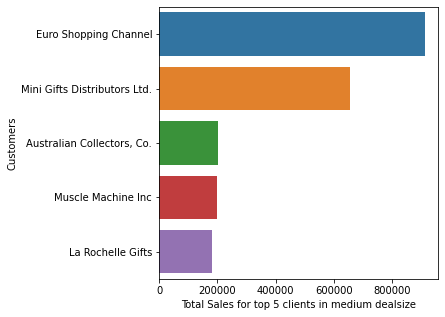

In [915]:
# Creating barplot for top 5 clients for large dealsize
f, ax = plt.subplots(figsize= (5, 5))
sns.barplot(y="CUSTOMERNAME", x="SALES", data= large5)
ax.set(xlabel="Total Sales for top 5 clients in medium dealsize", ylabel="Customers")

Smallest transaction for large dealsize is with "Blauer See Auto. Co" and amount of transaction is $701,631 and largest transaction for large dealsize is with "The Sharp Gifts Warehouse" and amount is $1,408,280.# Creating barplot for top 5 clients for medium dealsize

# Strongest Sales Period

## Strongest Sales Period - by Value

In [916]:
sales_value = sales.groupby('Month-Year')['SALES'].sum().reset_index().sort_values('SALES', ascending=False)
sales_value

,Month-Year,SALES
22,2004-11,1089048.01
10,2003-11,1029837.66
9,2003-10,568290.97
21,2004-10,552924.25
19,2004-08,461501.27
28,2005-05,457861.06
26,2005-03,374262.76
23,2004-12,372802.66
25,2005-02,358186.18
24,2005-01,339543.42


[Text(0.5, 1.0, 'Highest Sales by Value in different months')]

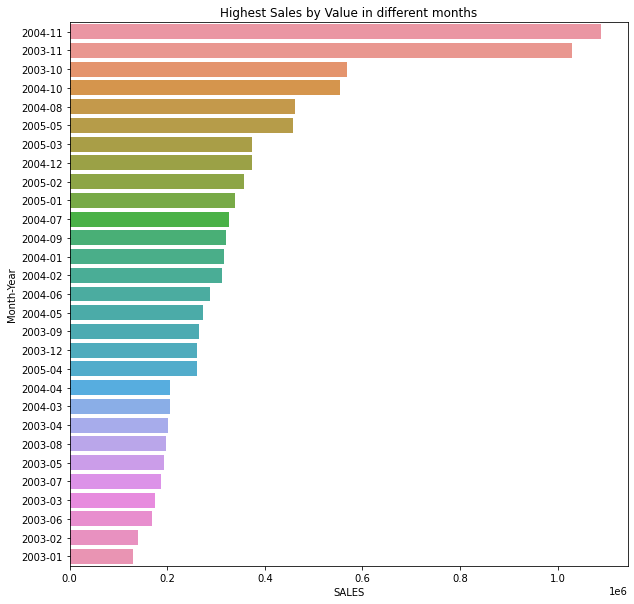

In [917]:
f, ax= plt.subplots(figsize= (10,10))
sns.barplot(y="Month-Year", x="SALES", data= sales_value)
ax.set(title="Highest Sales by Value in different months")

October and November in 2003 and 2004 are the strongest sales period for the company and hence organizational strategies should be made accordingly. Data is available till May 2005 that's why October and November are not showing up in the plot. 

## Strongest Sales Period - by Volume

In [918]:
sales_volume = sales.groupby('Month-Year')['QUANTITYORDERED'].sum().reset_index().sort_values('QUANTITYORDERED', ascending=False)
sales_volume

,Month-Year,QUANTITYORDERED
22,2004-11,10678
10,2003-11,10179
9,2003-10,5515
21,2004-10,5483
19,2004-08,4564
28,2005-05,4357
26,2005-03,3852
23,2004-12,3804
24,2005-01,3395
25,2005-02,3393


[Text(0.5, 1.0, 'Highest Sales by Volume in different months')]

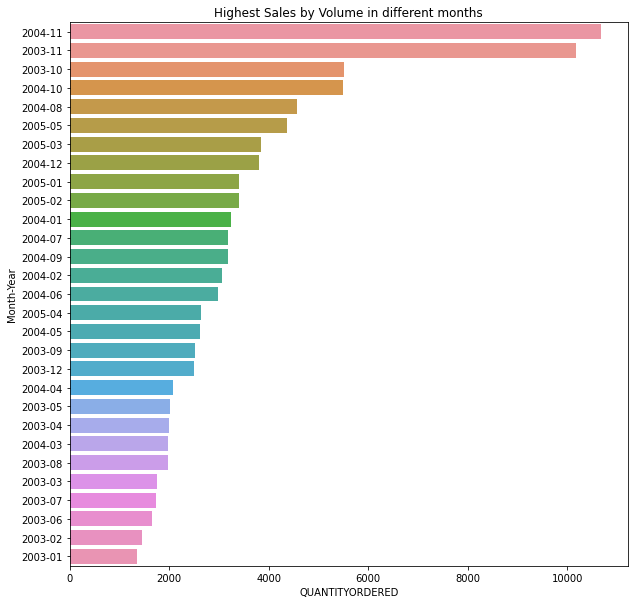

In [919]:
f, ax= plt.subplots(figsize= (10,10))
sns.barplot(y="Month-Year", x="QUANTITYORDERED", data= sales_volume)
ax.set(title="Highest Sales by Volume in different months")

Even volume wise, October and November in 2003 and 2004 are the strongest sales period by volume. It was calculated by summing up QUANTITYORDERED by the customers in different months. 

We can tell from the results that October and November are the strongest sales period both by volume and by dollar value.

# Top Selling Region

## Top Selling Region - By Value

In [920]:
region_value = sales.groupby('COUNTRY')['SALES'].sum().reset_index().sort_values('SALES', ascending=False)
region_value

,COUNTRY,SALES
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


[Text(0.5, 1.0, 'Top Region by Value')]

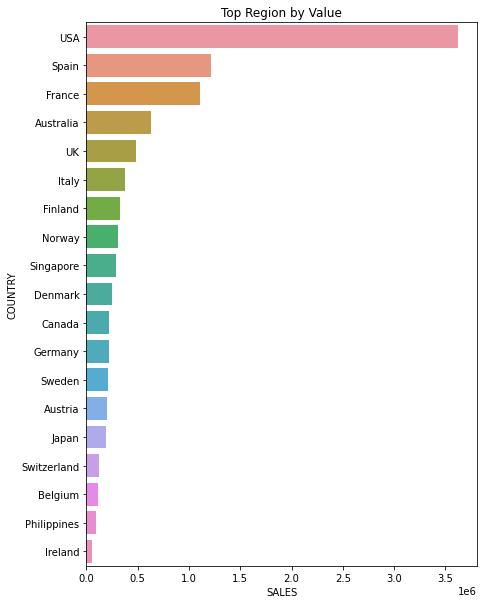

In [921]:
f, ax= plt.subplots(figsize= (7,10))
sns.barplot(y="COUNTRY", x="SALES", data= region_value)
ax.set(title="Top Region by Value")

USA is the top region by value. It means that the company makes most of the sales locally from US followed by Spain, France and Australia. 

## Top Selling Product - By Volume

In [922]:
region_volume = sales.groupby('COUNTRY')['QUANTITYORDERED'].sum().reset_index().sort_values('QUANTITYORDERED', ascending=False)
region_volume

,COUNTRY,QUANTITYORDERED
18,USA,35659
14,Spain,12429
6,France,11090
0,Australia,6246
17,UK,5013
9,Italy,3773
5,Finland,3192
11,Norway,2842
13,Singapore,2760
3,Canada,2293


[Text(0.5, 1.0, 'Top Region by Volume')]

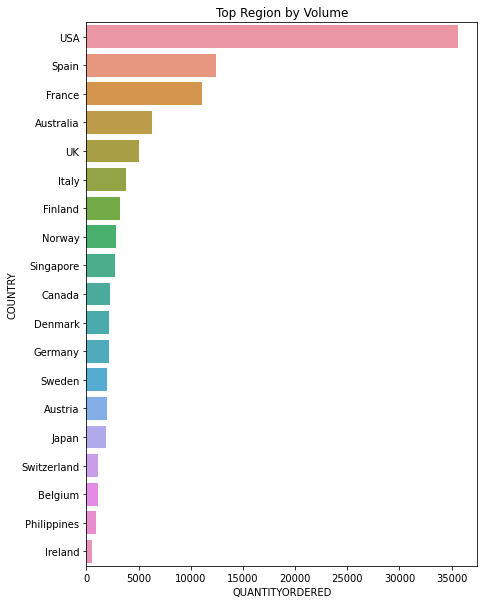

In [923]:
f, ax= plt.subplots(figsize= (7,10))
sns.barplot(y="COUNTRY", x="QUANTITYORDERED", data= region_volume)
ax.set(title="Top Region by Volume")

Volume wise, it shows same result. It means that the company sales mostly in US followed by Spain, France and Australia both by volume and value. 

# Summary

- Data had some issues such as typos which were removed 
- Data was checked for duplicates and missing values. There were no duplicates but there are missing values in addressline2, state, territory and postalcode. Since it does not affect analysis that's why these entries were not removed.
- Sales and MSRP did not have dollar sign which were asked to add. Later on, dollar sign was removed during analysis as plot was needed to create 
- Cleaned data has been saved as csv
- Phone column was unstandardized and all characters such as space, hyphen, brackets, etc were removed and + was replaced with 00
- October and November in 2003 and 2004 are the strongest sales period both by value and volume
- S10-1949 and S10-4698 are the top selling products in the given data
- Euro Shopping Channel is the biggest client overall and in all dealsize
- US is the biggest country in terms of sales and volume followed by Spain, France and Australia
- Cancellation rate is mostly 0 but in October 2003, May 2004 and June 2004 it jumped to almost 11%, 23% and 54% respectively